In [6]:
# Import the relevant libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

# Display dataset for easy lookup and use
energy = pd.read_csv("energy.csv") #SOURCE: https://ccaf.io/cbeci/index
energy

,Month,Consumption,Cumulative
0,July 2010,0.00,0.00
1,August 2010,0.00,0.00
2,September 2010,0.00,0.00
3,October 2010,0.00,0.00
4,November 2010,0.00,0.00
...,...,...,...
137,December 2021,9.99,305.38
138,January 2022,10.56,315.94
139,February 2022,9.59,325.53
140,March 2022,10.46,335.99


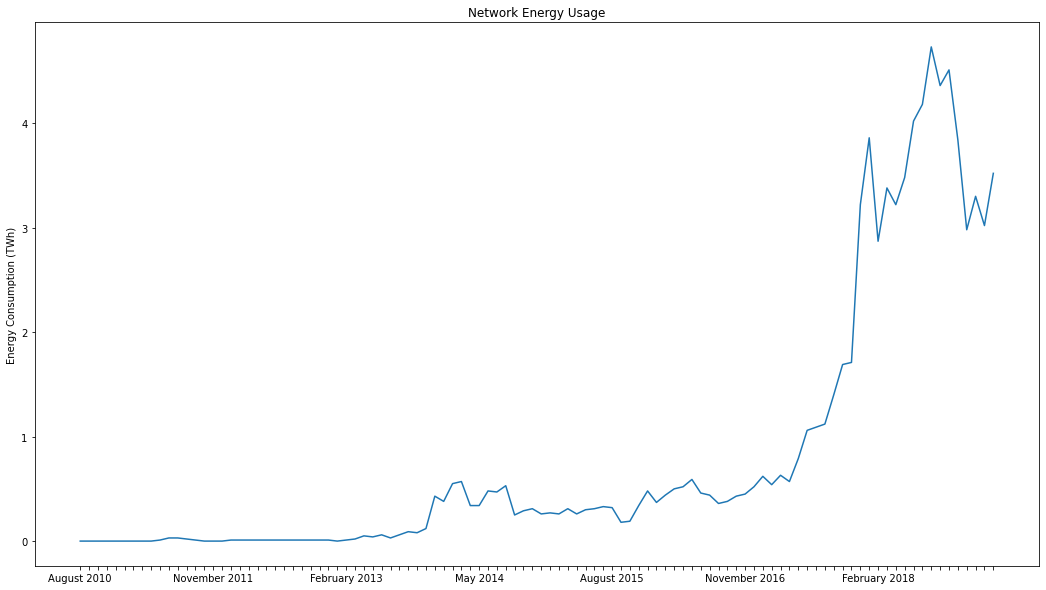

In [16]:
# Convert a number into the word format for a month
def toWords(month):
    if(month == 1):
        return 'January'
    if(month == 2):
        return 'February'
    if(month == 3):
        return 'March'
    if(month == 4):
        return 'April'
    if(month == 5):
        return 'May'
    if(month == 6):
        return 'June'
    if(month == 7):
        return 'July'
    if(month == 8):
        return 'August'
    if(month == 9):
        return 'September'
    if(month == 10):
        return 'October'
    if(month == 11):
        return 'November'
    if(month == 12):
        return 'December'
    
# Function to create the graph for energy usage, or return the price and date data for any valid time range
def getEnergyGraph(startYear, startMonth, endYear, endMonth, plot):
    #Initialize variables
    curYear = startYear
    curMonth = startMonth
    priceData = []
    dateData = []
    ticks = 0
    
    #Loop to fill out the two arrays
    while(curYear < endYear or (curYear == endYear and curMonth <= endMonth)):
        #Create a custom formatted date string to search the dataset from
        dateString = toWords(curMonth)+' '+str(curYear)
        priceData.append(energy.loc[energy['Month'] == dateString]['Consumption'].item())
        dateData.append(toWords(curMonth)+' '+str(curYear))
        
        #Increment function that keeps the month/year formatting correct
        curMonth+=1
        ticks+=1
        if(curMonth > 12):
            curMonth = 1
            curYear+=1
    
    #Create a graph, if that is why the function was called
    if(plot == True):
        fig, ax = plt.subplots()
        #Make the graph bigger
        plt.rcParams["figure.figsize"] = (18,10)
        #Titles
        plt.title("Network Energy Usage")
        plt.ylabel("Energy Consumption (TWh)")

        plt.plot(dateData, priceData)
        #Customize x-axis based on the time range, in order to not overflow it with date labels
        every_nth = math.ceil(ticks/7)
        for n, label in enumerate(ax.xaxis.get_ticklabels()):
            if n % every_nth != 0:
                label.set_visible(False)
    else:  
        #Otherwise, just return the two arrays
        return [dateData, priceData]

#Test the graph function
getEnergyGraph(2010, 8, 2019, 3, True)

In [8]:
#Import dataset of historical BitCoin prices and display for ease of viewing
prices = pd.read_csv("prices.csv") #SOURCE: https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory
prices

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


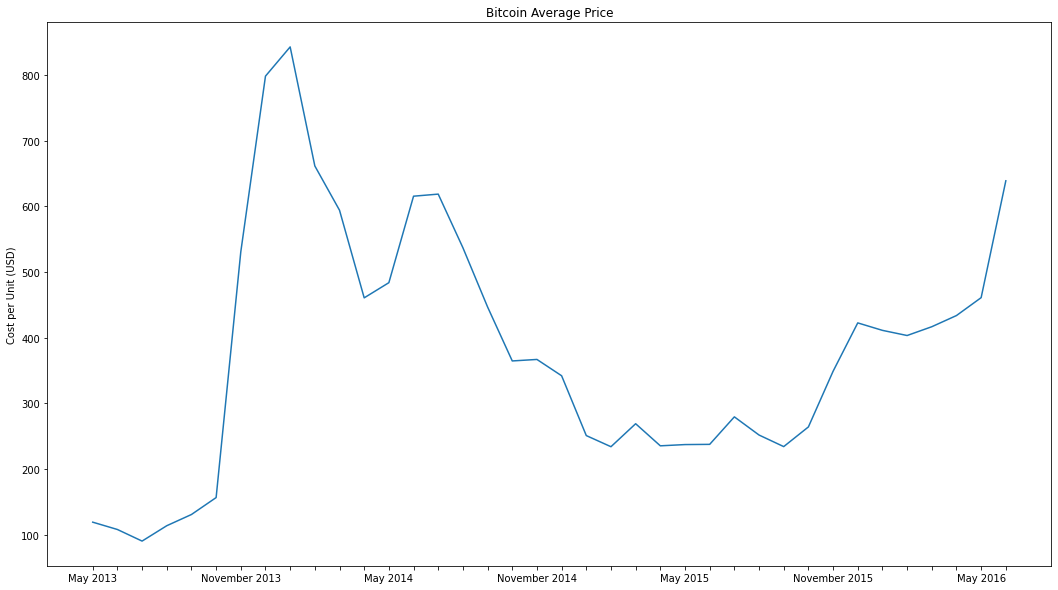

In [17]:
# Other version: https://pastebin.com/aH8k7cUS
# Utility function that converts numbers to strings and adds a zero if needed
def prefix(num):
    if(num < 10):
        return '0'+str(num)
    return str(num)

# Function that returns the average BitCoin price in any given month
def getMonth(year, month):
    #Initialize variables
    days = 0
    s = 0
    #Get the number of days in a month
    if(month == 1 or month == 3 or month == 5 or month == 7 or month == 8 or month == 10 or month == 12):
        days = 31
    elif(month == 4 or month == 6 or month == 9 or month == 11):
        days = 30
    else:
        if(year == 2016 or year == 2020):
            # Hardcode leap years since the time range for the dataset is small
            days = 29
        else:
            days = 28
            
    #Calculate the sum of the median of the prices for each day
    for day in range(1, days+1):
        date = str(year)+'-'+prefix(month)+'-'+prefix(day)+' 23:59:59'
        s+=(prices.loc[prices['Date'] == date]['High'].item()+prices.loc[prices['Date'] == date]['Low'].item())/2
        
    #Return the average
    return s/days
    

def getPriceGraph(startYear, startMonth, endYear, endMonth, plot):
    #Initialize variables
    curYear = startYear
    curMonth = startMonth
    priceData = []
    dateData = []
    ticks = 0
    
    #Loop to fill out the two arrays
    while(curYear < endYear or (curYear == endYear and curMonth <= endMonth)):
        #Use the getMonth function to easily get the price data
        priceData.append(getMonth(curYear, curMonth))
        dateData.append(toWords(curMonth)+' '+str(curYear))
        #Increment function that keeps the month/year formatting correct
        curMonth+=1
        ticks+=1
        if(curMonth > 12):
            curMonth = 1
            curYear+=1
    
    #Create a graph, if that is why the function was called
    if(plot == True):
        fig, ax = plt.subplots()
        #Make the graph bigger and add titles
        plt.rcParams["figure.figsize"] = (18,10)
        plt.title("Bitcoin Average Price")
        plt.ylabel("Cost per Unit (USD)")

        plt.plot(dateData, priceData)
        
        #Customize x-axis based on the time range, in order to not overflow it with date labels
        every_nth = math.ceil(ticks/7)
        for n, label in enumerate(ax.xaxis.get_ticklabels()):
            if n % every_nth != 0:
                label.set_visible(False)
    else:
        #Otherwise, just return the two arrays
        return [dateData, priceData]

#Test the graph function
getPriceGraph(2013, 5, 2016, 6, True)

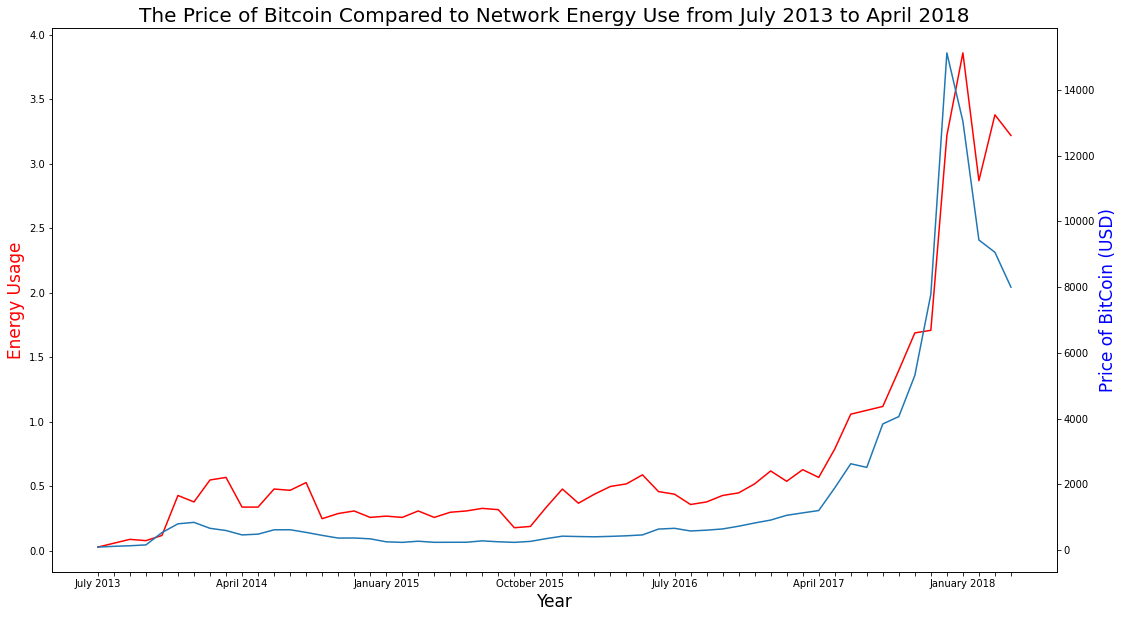

In [18]:
#Overlay the two plots on top of each other to get the final graph
def finalPlot(startYear, startMonth, endYear, endMonth):
    # Valid date ranges: From 05/2013 to 06/2020
    
    #Get the energy and price data from the query functions
    eData = getEnergyGraph(startYear, startMonth, endYear, endMonth, False)
    pData = getPriceGraph(startYear, startMonth, endYear, endMonth, False)
    
    fix, ax = plt.subplots()
    
    #Create the first graph for energy usage in red
    ax.plot(eData[0], eData[1], label = 'Energy Use', color = 'red')
    ax.set_xlabel("Year",fontsize=17)
    ax.set_ylabel("Energy Usage",color="red",fontsize=17)
    
    #Twin the graph and plot it in blue
    ax2=ax.twinx()
    ax2.plot(pData[0], pData[1], label = 'BitCoin Price')
    ax2.set_ylabel("Price of BitCoin (USD)",color="blue",fontsize=17)
    
    #Custom x-axis label function
    every_nth = math.ceil(((endYear-startYear)*12+(endMonth-startMonth))/7)
    for n, label in enumerate(ax.xaxis.get_ticklabels()):
        if n % every_nth != 0:
            label.set_visible(False)
            
    plt.title("The Price of Bitcoin Compared to Network Energy Use from "+toWords(startMonth)+" "+str(startYear)+" to "+toWords(endMonth)+" "+str(endYear), size=20)
    plt.show()

#Test the display function  
finalPlot(2013, 7, 2018, 4)

In [11]:
import scipy.stats as stats

#A more useful function that adds the addend to the given month+year combination
def addMonth(year, month, add):
    month+=add
    #Could be more efficient using modulus but since the variables are so small it should not matter
    while(month>12):
        month-=12
        year+=1
    while(month < 1):
        month+=12
        year-=1

    return[month, year]      
        
        
def getCorr(startYear, startMonth, endYear, endMonth, energyOffset):
    # From 05/2013 to 06/2020
    # Energy data has such a large range that any offset should not affect the basic boundaries...maybe
    
    #Calculate the new start and end points after the offset
    newStart = addMonth(startYear, startMonth, energyOffset)
    newEnd = addMonth(endYear, endMonth, energyOffset)
    #Use the query functions from earlier to get the results into an array
    eData = getEnergyGraph(newStart[1], newStart[0], newEnd[1], newEnd[0], False)[1]
    pData = getPriceGraph(startYear, startMonth, endYear, endMonth, False)[1]
    
    return stats.pearsonr(eData, pData)

getCorr(2013, 7, 2020, 4, 0)

(0.8727335164699979, 1.2419816708968082e-26)

In [12]:
def tryOffset(startYear, startMonth, endYear, endMonth):
    # Try to get largest R value, default search range of +-12 months
    bestR = -1
    rP = 1
    rOffset = 0
    #Search using the getCorr function
    for i in range(-12, 13):
        
        arr = getCorr(startYear, startMonth, endYear, endMonth, i)
        
        if(arr[1] < 0 or arr[1] > 0.1):
            #If the p-value is wonky, abort the test case and notify the user
            print("Aborted test case "+str(i)+" due to invalid p-value.")
            continue
        
        #If the r-value exceeds the current best, update the variables
        if(arr[0] > bestR):
            bestR = arr[0]
            rP = arr[1]
            rOffset = i
        
        print("Testing "+str(i)+" resuled in a R value of "+str(arr[0])+". The p-value was "+str(arr[1]))
            
    print("")
    #Output the results after an indentn
    print("The highest value of R observed was when offset was "+str(rOffset)+". The R value was "+str(bestR)+" with p-value "+str(rP))

#Test the best offset
tryOffset(2013, 7, 2020, 4)

Testing -12 resuled in a R value of 0.6435937259194283. The p-value was 6.96337204816185e-11
Testing -11 resuled in a R value of 0.6526009292927449. The p-value was 3.071720539366555e-11
Testing -10 resuled in a R value of 0.6571921557472935. The p-value was 2.0025200525605834e-11
Testing -9 resuled in a R value of 0.6507802126066552. The p-value was 3.6323569097600704e-11
Testing -8 resuled in a R value of 0.6490126087764914. The p-value was 4.269747690675885e-11
Testing -7 resuled in a R value of 0.6555795028410427. The p-value was 2.3291858403022603e-11
Testing -6 resuled in a R value of 0.6633822999209763. The p-value was 1.111561669900189e-11
Testing -5 resuled in a R value of 0.6855171502517879. The p-value was 1.203480580345911e-12
Testing -4 resuled in a R value of 0.7184785176533104. The p-value was 2.9786355139090306e-14
Testing -3 resuled in a R value of 0.7486015440253768. The p-value was 6.206741717739736e-16
Testing -2 resuled in a R value of 0.7843164476167583. The p-val